## Интеллектуальный анализ данных – весна 2023
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import pandas as pd

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(7)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [4]:
# пропущенные значения - отсутствуют
print(X.isna().values.any())
# X.dropna(subset=[], inplace=True)

False


In [5]:
cat_features_mask = (X.dtypes == "object").values

# категориальные признаки - отсутствуют
print(X.columns[cat_features_mask])

Index([], dtype='object')


* **Пропущенные значения отсутствуют**
* **Категориальные признаки отсутствуют**

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=18)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [9]:
sc = StandardScaler()
chosen_features = ['alcohol', 'magnesium']
X_train_alcmag = X_train[chosen_features]
X_test_alcmag  = X_test[chosen_features]

sc.fit(X_train_alcmag)

X_train_scaled = pd.DataFrame(data=sc.transform(X_train_alcmag), columns=X_train_alcmag.columns).values
X_test_scaled = pd.DataFrame(data=sc.transform(X_test_alcmag), columns=X_test_alcmag.columns).values

In [10]:
neighbours_counts = [1, 3, 5, 10, 15, 25]
models = []

print(f'{"NN":<8} {"Train":<7} {"Test":<7}')
for k in neighbours_counts:
    model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    model.fit(X_train_scaled, y_train)
    models.append(model)
    
    predictions_train = model.predict(X_train_scaled)
    train_score = accuracy_score(y_train, predictions_train)
    
    predictions_test = model.predict(X_test_scaled)
    test_score = accuracy_score(y_test, predictions_test)
    print(f'{k:<8} {train_score:<7.2f} {test_score:<7.2f}')

NN       Train   Test   
1        1.00    0.67   
3        0.83    0.69   
5        0.81    0.67   
10       0.79    0.76   
15       0.71    0.74   
25       0.68    0.69   


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [21]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [22]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

In [23]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

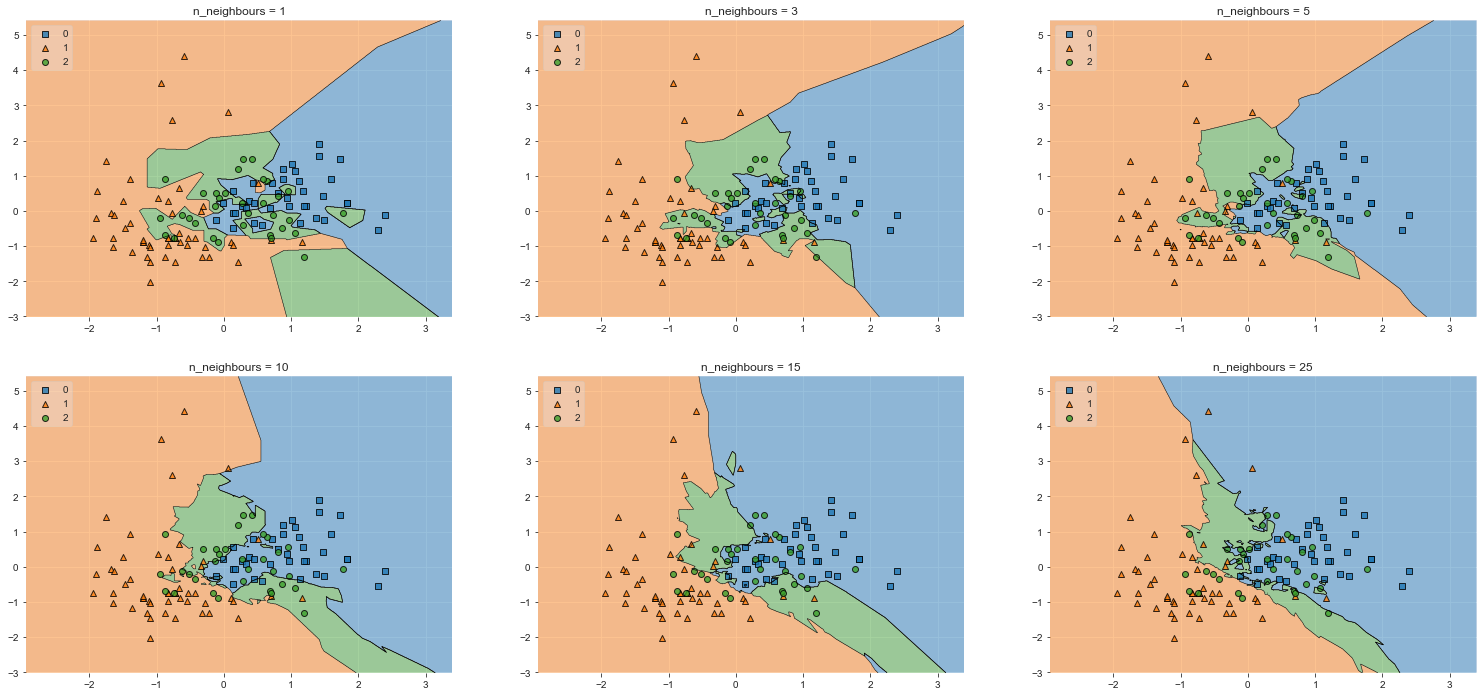

In [24]:
fig = plt.figure(figsize=(26,12))
gs = gridspec.GridSpec(2, 3)
labels = [f"n_neighbours = {n}" for n in neighbours_counts]
for label, grid, model in zip(labels, itertools.product([0, 1],[0, 1, 2]), models):
    ax = plt.subplot(gs[grid[0], grid[1]])
    fig = plot_decision_regions(X=X_train_scaled, y=y_train, clf=model, legend=2)
    plt.title(label)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

**Выводы**
* Оптимальное количество соседей для обучения классификатора - 10, так как при этом значении доля правильных ответов на тестовой выборке максимальна (при этом разница между точностью на тренировочной и тестовой выборках минимальна).
* Такое количество соседей обусловлено тем, что класс 2 (зелёный) находится посередине (на стыке) между классами 0 (синим) и 1 (оранжевый). Из-за такой геометрии данных, при слишком маленьком значении числа соседей, модель сильно переобучается (так как при маленьком k, knn очень чувствителен к выбросам), а при значительном увеличении числа соседей, модель недообучается, игнорируя многие объекты зеленого класса.
* Наиболее правильная форма решающей поверхности при k=10, так как при маленьких значениях k на графике решающих поверхностей много 'островков', иллюстрирующих переобучение модели, а при k=25 граница между оранжевым (1) и синим (0) классами начинает сильно сглаживаться, что может свидетельствовать о недообучении.

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

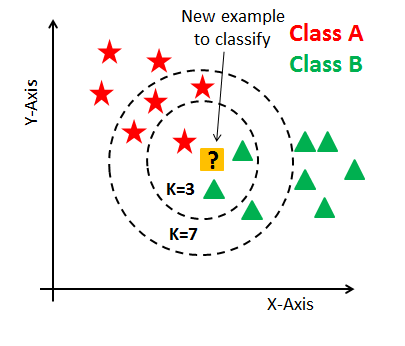

In [11]:
import numpy as np

class KNN:
    def __init__(self, k:int):
        self.k = k
        self.dataset = None
    
    def fit(self, X, y):
        self.dataset = np.c_[X, y]

    def __distance(self, a, b):
        return (a[0] - b[0])**2 + (a[1] - b[1])**2

    def __get_class(self, row):
        neighbours = np.array(sorted(list(self.dataset), key=lambda x: self.__distance(row, x))[:self.k])
        return np.argmax(np.bincount(neighbours[:,2]))

    def predict(self, X):
        predictions = np.apply_along_axis(self.__get_class, axis=1, arr=X)
        return predictions

In [12]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [13]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [16]:
data = pd.read_csv('data/diamonds.csv')
data.head(7)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [17]:
# data.info()
print(data.isna().values.any())

False


* Пропущенные значения отсутствуют

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [18]:
data = data.drop('Unnamed: 0', axis=1)

* Столбец 'Unnamed: 0' выступает в качестве индексного столбца, дополнительной информации не несет.

**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [25]:
import seaborn as sns

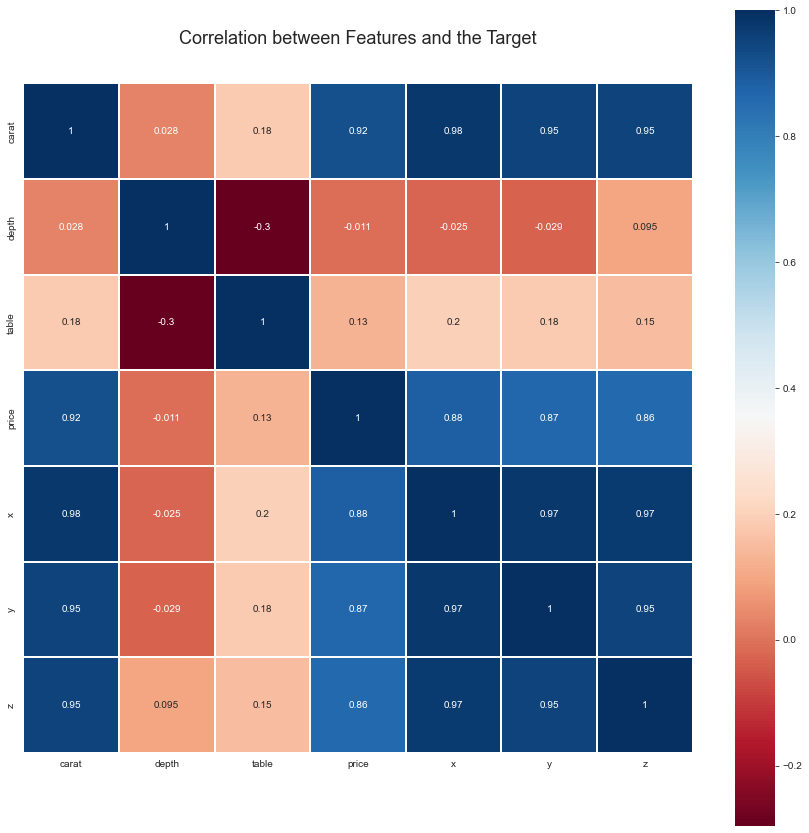

In [26]:
colormap = plt.cm.RdBu
plt.figure(figsize=(15,15))

plt.title('Correlation between Features and the Target', y=1.05, size=18)
sns.heatmap(data.corr(), linewidths=0.1, vmax=1.0,
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

In [28]:
print("Correlation with the Target:")
print(f"{'Feature':8} {'Correlation'}")

print(data.corr().drop('price')['price'].sort_values(ascending=False))

Correlation with the Target:
Feature  Correlation
carat    0.921591
x        0.884435
y        0.865421
z        0.861249
table    0.127134
depth   -0.010647
Name: price, dtype: float64


##### Выводы
1. Больше всего с целевой переменной коррелируют вещественные признаки:
* carat - 0.922
* x - 0.884
* y - 0.865
* z - 0.861
2. Однако эти признаки также сильно коррелируют между собой (от 0.95 до 0.98), что может вызвать проблему мультиколлинеарности



**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [29]:
X = data.drop('price', axis=1)
y = data['price']
X_1hot = pd.get_dummies(X, drop_first=True)
X_1hot.head(6)

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
5,0.24,62.8,57.0,3.94,3.96,2.48,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_1hot, y, test_size=0.3, random_state=123)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [31]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X_train)
X_train = pd.DataFrame(data=sc.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(data=sc.transform(X_test), columns=X_test.columns)

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

In [33]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [34]:
y_train_pred = lr.predict(X_train)
print("Linear Regression Stats:")
print(f'R\u00b2 score on Train: {r2_score(y_train, y_train_pred):.4f}')
# близкий к 1 R^2 свидетельствует о функциональной зависимости между переменными

Linear Regression Stats:
R² score on Train: 0.9200


In [35]:
y_test_pred = lr.predict(X_test)

In [36]:
print(f'MSE on Train: {mse(y_train, y_train_pred):.4f}')
print(f'MSE on Test: {mse(y_test, y_test_pred):.4f}')

MSE on Train: 1270791.8536
MSE on Test: 1291193.8990


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [37]:
lr_coefs = pd.DataFrame(data = lr.coef_, index = X_1hot.columns, columns=["coefficient"])
print("Linear Regression weights:")
lr_coefs.sort_values(by="coefficient", ascending=False)

Linear Regression weights:


,coefficient
carat,5307.717343
clarity_VS2,1814.473418
clarity_VS1,1659.362719
clarity_SI1,1592.525226
clarity_VVS2,1456.147658
clarity_VVS1,1280.196533
clarity_SI2,1038.761686
clarity_IF,959.220402
cut_Ideal,420.765029
cut_Premium,344.490788


##### По модулю на порядок превышают оценки прочих коэффициентов:
1. **carat : 5446.063312**
2. **clarity_VS2 : 1742.625126**
3. **clarity_VS1 : 1608.319145**
4. **clarity_SI1 : 1526.364100**
5. **clarity_VVS2 : 1418.438674**
6. **x : -1273.882315**
7. **clarity_VVS1 : 1229.158814**
8. **clarity_SI2 : 971.783207**
9. **clarity_IF : 936.591657**

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [38]:
from sklearn.linear_model import Lasso, Ridge

In [39]:
lasso = Lasso(10).fit(X_train, y_train)
print(f"Lasso Regression MSE on Train: {mse(y_train, lasso.predict(X_train)):.4f}")
print(f"Lasso Regression MSE on Test: {mse(y_test, lasso.predict(X_test)):.4f}")

Lasso Regression MSE on Train: 1330860.8350
Lasso Regression MSE on Test: 1341488.7420


In [40]:
lasso_coefs = pd.DataFrame(data = lasso.coef_, index = X_1hot.columns, columns=["coefficient"])
print("Lasso Regression weights:")
lasso_coefs.sort_values(by="coefficient", ascending=False)

Lasso Regression weights:


,coefficient
carat,4825.591889
clarity_VS2,1096.742828
clarity_VS1,1038.781995
clarity_VVS2,955.793460
clarity_SI1,859.335314
clarity_VVS1,845.656060
clarity_IF,645.580577
clarity_SI2,402.432325
cut_Ideal,207.416634
cut_Premium,152.773649


In [41]:
ridge = Ridge(10).fit(X_train, y_train)
print(f"Ridge Regression MSE on Train: {mse(y_train, ridge.predict(X_train)):.4f}")
print(f"Ridge Regression MSE on Test: {mse(y_test, ridge.predict(X_test)):.4f}")

Ridge Regression MSE on Train: 1270916.0828
Ridge Regression MSE on Test: 1291165.5531


In [42]:
ridge_coefs = pd.DataFrame(data = ridge.coef_, index = X_1hot.columns, columns=["coefficient"])
print("Ridge Regression weights:")
ridge_coefs.sort_values(by="coefficient", ascending=False)

Ridge Regression weights:


,coefficient
carat,5270.623943
clarity_VS2,1784.952441
clarity_VS1,1634.030881
clarity_SI1,1562.217047
clarity_VVS2,1435.889276
clarity_VVS1,1262.828387
clarity_SI2,1012.935906
clarity_IF,946.853565
cut_Ideal,421.414874
cut_Premium,345.135106


##### Выводы:
* При Lasso-регрессии (L1-регуляризации) веса уменьшились на порядок сильнее, чем при Ridge-регрессии (L2-регуляризации);
* На Lasso-регрессии наибольшие веса уменьшились на 500-700 единиц;
* На Ridge-регрессии наибольшие веса уменьшились не более чем на 50 единиц;
* О проблеме мультиколлинеарности в исходной регрессии свидетельствует то, что при Lasso-регрессии веса значительно уменьшились, а вес признака 'y' занулился (произошел отбор признаков, 'y' оказался незначащим признаком)

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [43]:
alphas = [0.1, 1, 10, 100, 200]
lasso_norms = []
ridge_norms = []
for alpha in alphas:
    ridge_alpha = Ridge(alpha).fit(X_train, y_train)
    lasso_alpha = Lasso(alpha).fit(X_train, y_train)
    lasso_norms.append(np.linalg.norm(lasso_alpha.coef_))
    ridge_norms.append(np.linalg.norm(ridge_alpha.coef_))

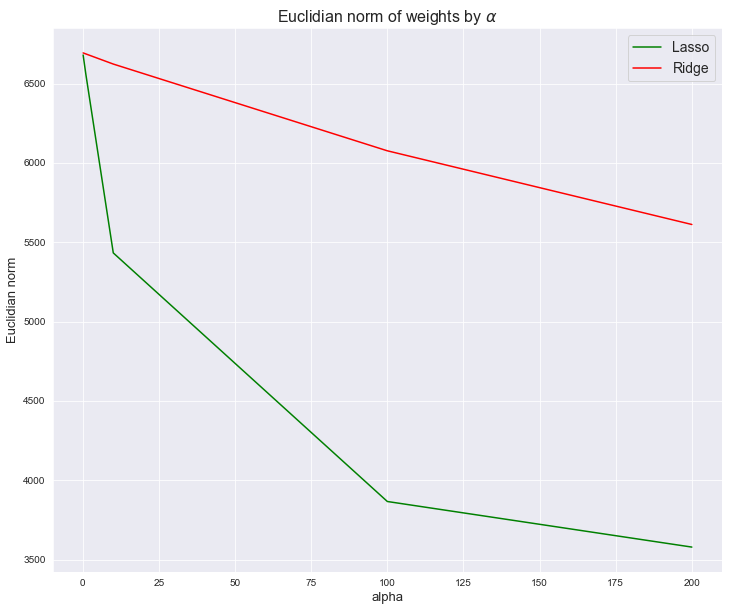

In [44]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12,10))
plt.plot(alphas, lasso_norms, c='g', label="Lasso")
plt.plot(alphas, ridge_norms, c='r', label="Ridge")

plt.title("Euclidian norm of weights by $\\alpha$", fontsize=16)
plt.xlabel("alpha", fontsize=13)
plt.ylabel("Euclidian norm", fontsize=13)
plt.legend(prop={'size': 14})
plt.show()

##### Выводы
* Lasso-регрессия агрессивнее уменьшает веса, чем Ridge-регрессия;
* Lasso-регрессию часто используют для отбора признаков, потому что в результате ее обучения коэффициенты незначащих признаков становятся равны нулю (в отличие от Ridge-регрессии, в которой коэффициенты принимают значения близкие к нулю, но не равные ему).
* Чем больше коэффициент $\alpha$, тем сильнее Lasso-регрессия уменьшает коэффициенты и тем больше признаков отсевается.

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [45]:
from sklearn.linear_model import LassoCV

In [46]:
# lasso_cv = LassoCV(alphas=np.arange(0, 200, 0.1), cv=5)
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X_train, y_train)
mse_matrix = pd.DataFrame(data=lasso_cv.mse_path_.mean(axis=1), index=lasso_cv.alphas_, columns=["MSE_mean"])
mse_matrix = mse_matrix.sort_values(by='MSE_mean')
mse_matrix

C:\Users\ageev\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2615960194.064743, tolerance: 47919147.97014151
  model = cd_fast.enet_coordinate_descent_gram(


,MSE_mean
1.0,1.276161e+06
0.1,1.287017e+06
10.0,1.334838e+06
100.0,1.785211e+06
200.0,2.155990e+06


In [47]:
print("MSE is minimal with alpha = ", lasso_cv.alpha_)

MSE is minimal with alpha =  1.0


**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [48]:
lasso_final = Lasso(lasso_cv.alpha_).fit(X_train, y_train)

print("Final Lasso Regression Stats:")
print(f"R\u00b2 on Train: {r2_score(y_train, lasso_final.predict(X_train)):.4f}")
print(f"R\u00b2 on Test: {r2_score(y_test, lasso_final.predict(X_test)):.4f}")
print(f"MSE on Train: {mse(y_train, lasso_final.predict(X_train)):.4f}")
print(f"MSE on Test: {mse(y_test, lasso_final.predict(X_test)):.4f}")

Final Lasso Regression Stats:
R² on Train: 0.9200
R² on Test: 0.9192
MSE on Train: 1271401.1596
MSE on Test: 1290690.8767


In [49]:
final_coef = pd.DataFrame(data = lasso_final.coef_, index = X_1hot.columns, columns=["coefficient"])
print("Final Lasso Regression weights:")
final_coef.sort_values(by="coefficient", ascending=False)

Final Lasso Regression weights:


,coefficient
carat,5259.479121
clarity_VS2,1741.835827
clarity_VS1,1596.561546
clarity_SI1,1518.312781
clarity_VVS2,1405.514751
clarity_VVS1,1236.221312
clarity_SI2,974.355596
clarity_IF,927.475466
cut_Ideal,399.618347
cut_Premium,325.477093


**Наиболее информативные признаки**
1. carat : 5259.479121
2. clarity
* clarity_VS2 : 1741.835827
* clarity_VS1 : 1596.561546
* clarity_SI1 : 1518.312781
* clarity_VVS2 : 1405.514751
* clarity_VVS1 : 1236.221312
* clarity_SI2 : 974.355596
* clarity_IF : 927.475466
3. x : -1046.564711

**Неинформативный признак** - y : 0.00
**Малоинформативные признаки**:
1. z : -39.469813
2. table : -64.079225

**Объяснение**
* Вес драгоценного камня (carat) играет наибольшую роль в формировании цены (в действительности покупатели чаще всего ориентируются именно на количество карат, когда судят о ценности камня).
* Измерения камня (высота - 'z', ширина - 'y' и 'table') сильно зависят от веса камня и длины 'x', что делает их неинформативными ('x' тоже не является информативным, так как сильно коррелирует с carat, но по этим коэффициентам такой вывод сделать сложно).
* Прозрачность (clarity) камня также должна играть роль в ценообразовании, так как она влияет на внешний вид камня, а следовательно на его привлекательность для покупателя. Больше прозрачность, больше цена.
* Цвет, по описанию датасета, имеет градацию от лучшего к худшему, поэтому разные цвета имеют сильно отличающиеся веса в модели. То же относится и к огранке (сut).

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [50]:
print(f"{'Lasso Regression (alpha = 1) MSE on Test:':45} {mse(y_test, lasso_final.predict(X_test))}")
print(f"{'Linear Regression MSE on Test:':45} {mse(y_test, lr.predict(X_test))}")

Lasso Regression (alpha = 1) MSE on Test:     1290690.876729883
Linear Regression MSE on Test:                1291193.898986285


#### Выводы
 1. Lasso-регрессия имеет более низкую MSE на тестовой выборке, поэтому её лучше использовать для прогнозирования цены;
 2. Возможное объяснение: Lasso-регрессия уменьшила влияние мультиколлинеарности признаков на обучение модели и уменьшила её переобучение;
 3. Однако разница в MSE двух моделей крайне мала, и, согласно моим наблюдениям, при другом разбиении выборки, успех Lasso-регрессии не гарантирован;
 4. Также Lasso-регрессия не полностью решает проблему больших весов, так, например, у carat вес сохраняется выше 5000 единиц, что означает огромное влияние этого признака на результат предсказания модели.
 5. Возможная причина такого большого веса - то, что цена зависит от части переменных (в частности от carat) нелинейно. Проанализировав датасет, я заметил, что с увеличением карат в 3 раза, цена увеличивается в 9 раз, что может говорить о логарифмической зависимости между этими признаками. Возможное решение - приведение вещественных признаков и целевой переменной к логарифмической шкале. Пример приведен ниже.

In [53]:
data = pd.read_csv('data/diamonds.csv')
data = data.drop('Unnamed: 0', axis=1)

def convert2log(df):
    cat_features_mask = (df.dtypes == "object").values
    for var in df.columns[~cat_features_mask]:
        df[var] = np.log(df[var]+0.01)
    return df
data_log = convert2log(data)

X_log = data_log.drop('price', axis=1)
y_log = data_log['price']
X_log_1hot = pd.get_dummies(X_log, drop_first=True)
X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X_log_1hot, y_log, test_size=0.3, random_state=13)

sc = StandardScaler()
sc.fit(X_log_train)
X_log_train = pd.DataFrame(data=sc.transform(X_log_train), columns=X_log_train.columns)
X_log_test = pd.DataFrame(data=sc.transform(X_log_test), columns=X_log_test.columns)

lr_log = LinearRegression()
lr_log.fit(X_log_train, y_log_train)

print(f"{'Log Linear Regression MSE on Train:':45} {mse(y_log_train, lr_log.predict(X_log_train)):.6f}")
print(f"{'Log Linear Regression MSE on Test:':45} {mse(y_log_test, lr_log.predict(X_log_test)):.6f}")

Log Linear Regression MSE on Train:           0.017545
Log Linear Regression MSE on Test:            0.018787
